In [6]:
from stg import STG
import numpy as np
import scipy.stats # for creating a simple dataset 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons 
from scipy.stats import norm

In [7]:
# Create a simple dataset
def create_twomoon_dataset(n, p):
    relevant, y = make_moons(n_samples=n, shuffle=True, noise=0.1, random_state=None)
    print(y.shape)
    noise_vector = norm.rvs(loc=0, scale=1, size=[n,p-2])
    data = np.concatenate([relevant, noise_vector], axis=1)
    print(data.shape)
    return data, y

n_size = 1000 #Number of samples
p_size = 20   #Number of features
X_data, y_data=create_twomoon_dataset(n_size,p_size)
print(X_data.shape)
print(y_data.shape)

(1000,)
(1000, 20)
(1000, 20)
(1000,)


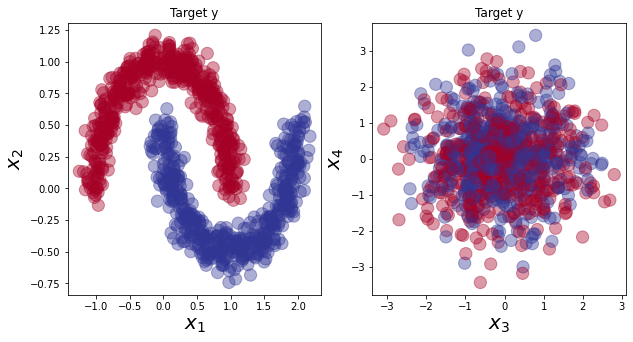

In [8]:
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,2], y=X_data[:,3], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[1].set_xlabel('$x_3$',fontsize=20)
ax[1].set_ylabel('$x_4$',fontsize=20)
ax[1].set_title('Target y')
plt.tick_params(labelsize=10)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

In [10]:
model = STG(task_type='classification',input_dim=X_train.shape[1], output_dim=2, hidden_dims=[60, 20], activation='tanh',
            optimizer='SGD', learning_rate=1e-2, batch_size=X_train.shape[0], freeze_onward=1, sigma=0.5, lam=0.0, random_state=1)

In [12]:
model.fit(X_train, y_train, nr_epochs=1000, print_interval=100)

Epoch: 100: loss=0.692264 time/data=0.002577 time/step=0.001490
Epoch: 200: loss=0.700872 time/data=0.002138 time/step=0.001045
Epoch: 300: loss=0.693283 time/data=0.002091 time/step=0.001071
Epoch: 400: loss=0.691564 time/data=0.002183 time/step=0.001075
Epoch: 500: loss=0.700600 time/data=0.002145 time/step=0.001118
Epoch: 600: loss=0.689289 time/data=0.002540 time/step=0.001649
Epoch: 700: loss=0.690548 time/data=0.002044 time/step=0.000922
Epoch: 800: loss=0.691964 time/data=0.002099 time/step=0.001078
Epoch: 900: loss=0.701059 time/data=0.002116 time/step=0.001029
Epoch: 1000: loss=0.701492 time/data=0.002067 time/step=0.001023


In [13]:
mu_after = 0
for name, p in model._model.named_parameters():
    if name == 'mu':
        mu_after = p
print(mu_after)

Parameter containing:
tensor([ 0.0128,  0.0667, -0.0025,  0.0043,  0.0078,  0.0020,  0.0011, -0.0083,
        -0.0002, -0.0075, -0.0095,  0.0027,  0.0053,  0.0046, -0.0013,  0.0055,
         0.0144,  0.0158,  0.0176,  0.0042], requires_grad=True)


In [26]:
for name, p in model._model.named_parameters(): 
    if name == 'mu':
        print(p.requires_grad) 

False


In [14]:
model.get_gates(mode='prob')

array([0.51284933, 0.5666757 , 0.49745452, 0.5042873 , 0.50778604,
       0.5020338 , 0.50111836, 0.49166283, 0.49977723, 0.4925454 ,
       0.49047974, 0.5026763 , 0.5053352 , 0.5046349 , 0.49871522,
       0.5055309 , 0.51443183, 0.5158311 , 0.5175921 , 0.50420225],
      dtype=float32)

In [8]:
model.get_gates(mode='raw')

array([ 0.92460734,  1.3170716 , -0.02602535,  0.01758794, -0.01391156,
       -0.00233567,  0.01405493,  0.01600558, -0.07511667, -0.03832965,
        0.03595508,  0.01182171,  0.0474039 ,  0.01591816,  0.0153749 ,
        0.04210947,  0.45639825,  0.09458261,  0.060252  , -0.0085176 ],
      dtype=float32)

## Testing the model

In [9]:
y_pred=model.predict(X_data)

/Users/yutaro/.pyenv/versions/stg/lib/python3.7/site-packages/stg/models.py:108: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._compose_output(self.softmax(logits))


In [11]:
y_pred[:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [12]:
y_data[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

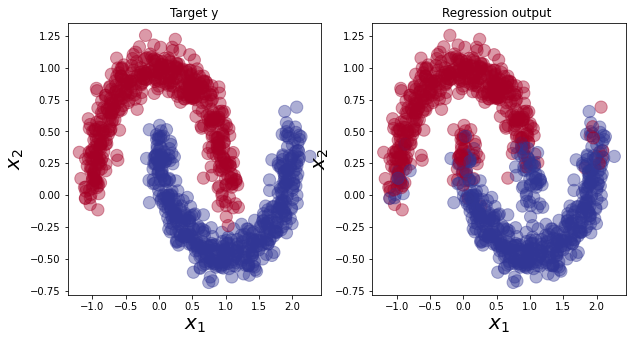

In [13]:
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[0].set_title('Target y')
ax[1].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_pred.reshape(-1),alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[1].set_title('Classification output ')
plt.tick_params(labelsize=10)